In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

In [11]:
df = pd.read_csv('../assets/preprocessed_df.csv')
df.head()

,CODIGO,NUMERO,REFERENCIA,CANTIDADCOMPRA,UNIDADESCONSUMOCONTENIDAS,PRECIO,IMPORTELINEA,TIPOCOMPRA,TGL,PRODUCTO,REGION,HOSPITAL,DEPARTAMENTO,MES,AÑO,PRECIOUNIDAD
0,E99808,1595724/23,178567.1,60,10,62.590000,375.540000,Compra menor,TRANSITO,APOSITO DE FIBRAS DE POLIACRILATO C/PLATA-3,1,2,60,1,2023,6.259000
1,B41691,72714/16,400403,40,10,102.803729,411.214916,Compra menor,ALMACENABLE,SOLUCION P/ LIMPIEZA Y DESCONTAMINACION DE HER...,0,10,1,2,2016,10.280373
2,E64543,71961/16,403770,20,5,12.100000,48.400000,Compra menor,TRANSITO,APOSITO DE HIDROFIBRA / CINTA-18,0,4,111,2,2016,2.420000
3,E65007,72773/16,20415,100,50,215.325000,430.650000,Concurso,ALMACENABLE,APOSITO DE ESPUMA POLIURETANO / SACRO-11,0,10,1,2,2016,4.306500
4,E64911,86159/17,20701,300,300,792.000000,792.000000,Concurso,ALMACENABLE,APOSITO C/ CARBON Y PLATA-6,0,6,1,2,2017,2.640000


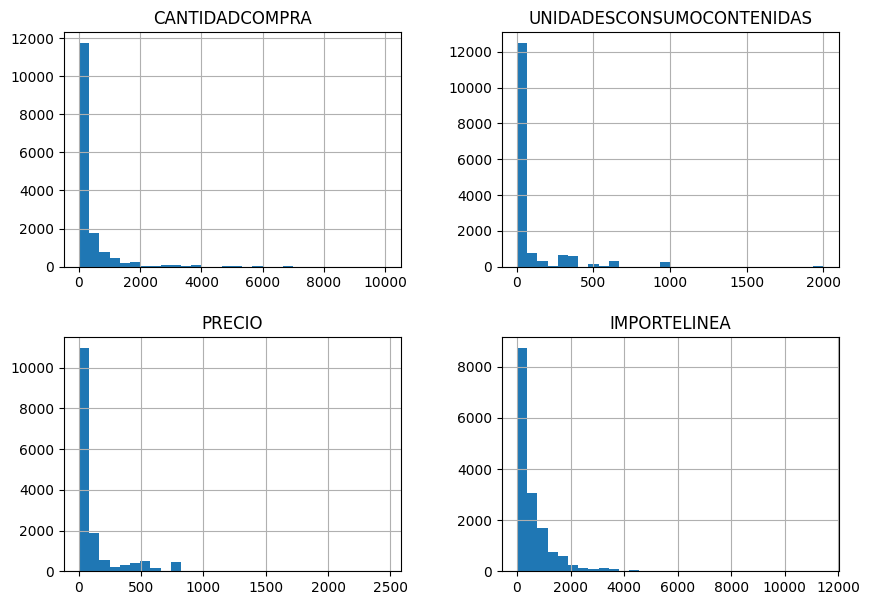

In [12]:
# Histogramas para variables numéricas
variables_numericas = ['CANTIDADCOMPRA', 'UNIDADESCONSUMOCONTENIDAS', 'PRECIO', 'IMPORTELINEA']
df[variables_numericas].hist(bins=30, figsize=(10, 7))
plt.show()


c:\Users\Cai Selvas Sala\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Cai Selvas Sala\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Cai Selvas Sala\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


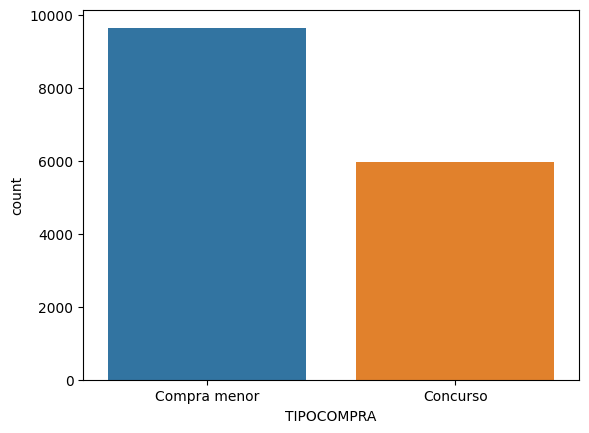

c:\Users\Cai Selvas Sala\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Cai Selvas Sala\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Cai Selvas Sala\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


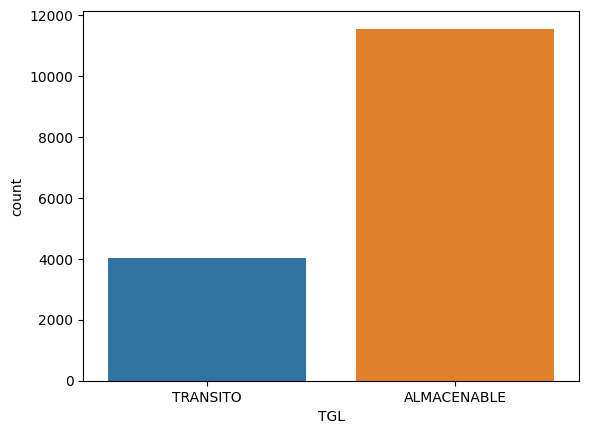

c:\Users\Cai Selvas Sala\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Cai Selvas Sala\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Cai Selvas Sala\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


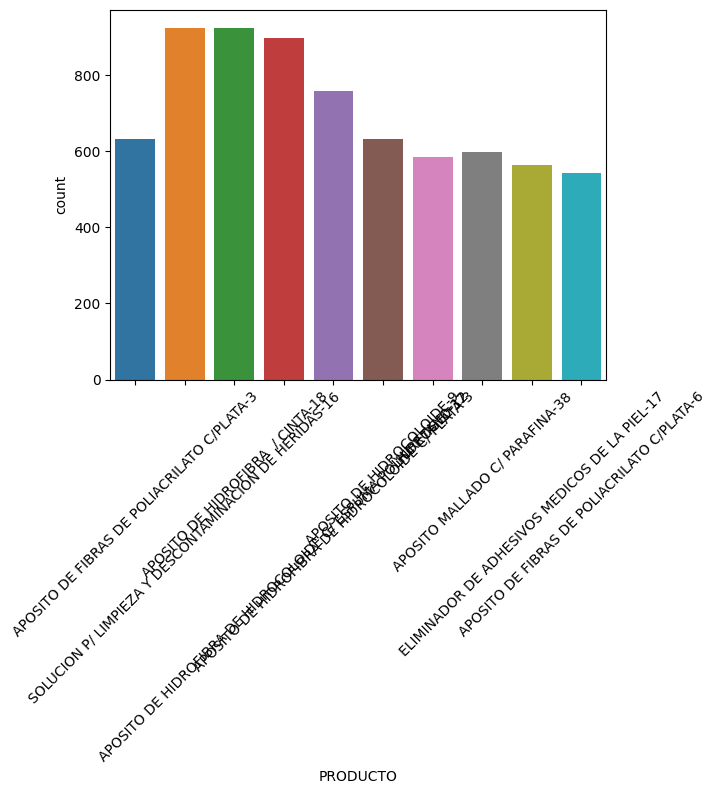

In [13]:
# Gráfico de barras para TIPOCOMPRA
sns.countplot(x='TIPOCOMPRA', data=df)
plt.show()

# Gráfico de barras para TGL
sns.countplot(x='TGL', data=df)
plt.show()

# Gráfico de barras para PRODUCTO (mostrar solo los top N si hay muchos productos)
top_n = 10
top_productos = df['PRODUCTO'].value_counts().head(top_n).index
sns.countplot(x='PRODUCTO', data=df[df['PRODUCTO'].isin(top_productos)])
plt.xticks(rotation=45)
plt.show()


c:\Users\Cai Selvas Sala\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Cai Selvas Sala\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Cai Selvas Sala\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


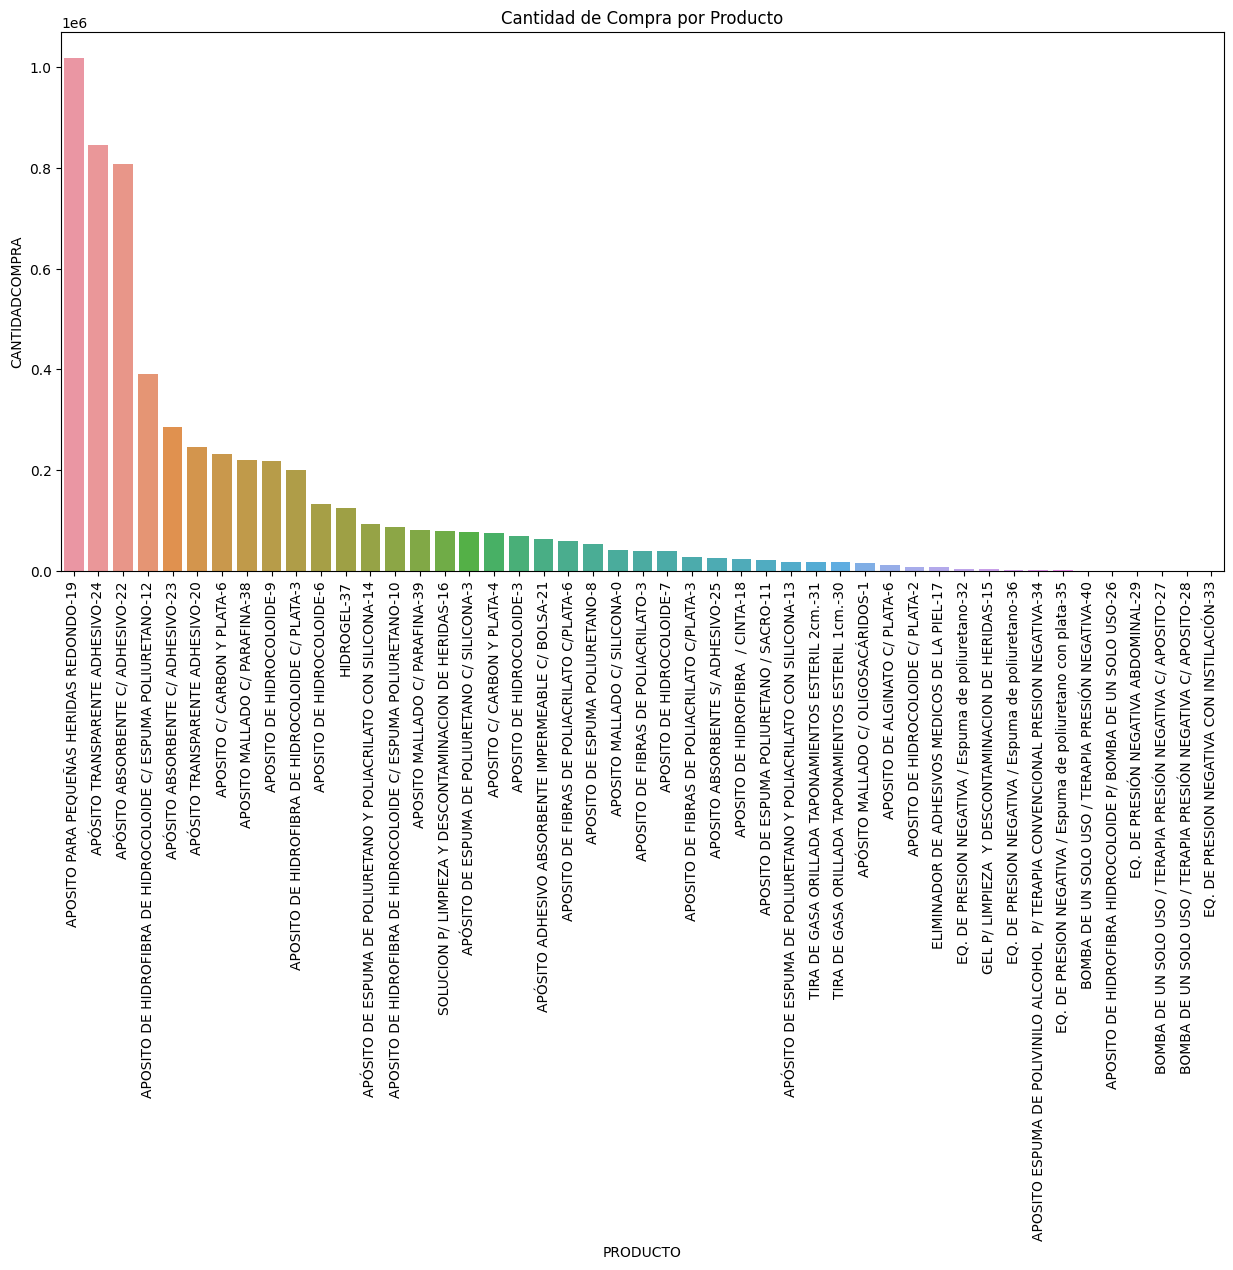

In [14]:

agrupado_por_producto = df.groupby('PRODUCTO').agg({
    'CANTIDADCOMPRA': 'sum',
    'UNIDADESCONSUMOCONTENIDAS': 'sum',
    'PRECIO': 'mean',
    'IMPORTELINEA': 'sum'
}).reset_index()

# Ordena los productos por la suma de 'CANTIDADCOMPRA' para mejorar la visualización
agrupado_por_producto = agrupado_por_producto.sort_values(by='CANTIDADCOMPRA', ascending=False)

# Gráfico de barras para 'CANTIDADCOMPRA' por 'PRODUCTO'
plt.figure(figsize=(15, 7))
sns.barplot(data=agrupado_por_producto, x='PRODUCTO', y='CANTIDADCOMPRA')
plt.xticks(rotation=90)
plt.title('Cantidad de Compra por Producto')
plt.show()

c:\Users\Cai Selvas Sala\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Cai Selvas Sala\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Cai Selvas Sala\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


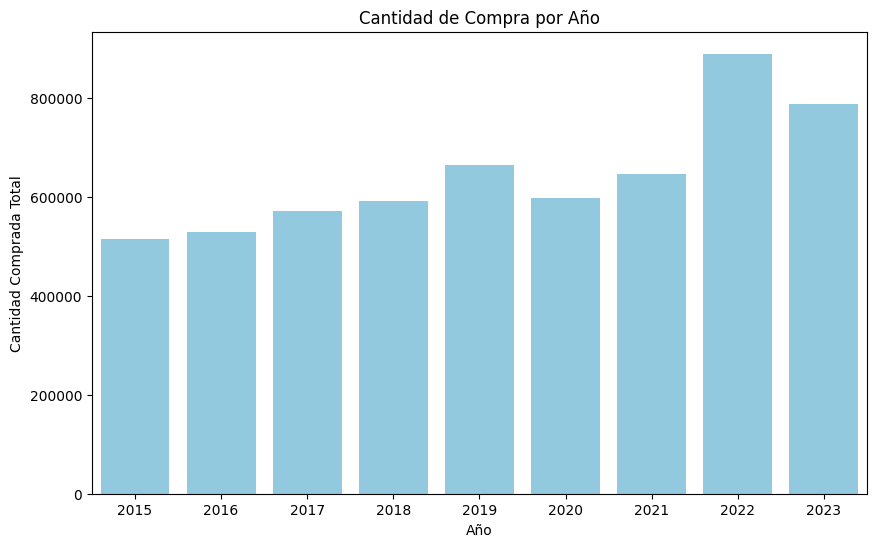

In [15]:
compras_por_año = df.groupby('AÑO')['CANTIDADCOMPRA'].sum().reset_index()

# Crear un gráfico de barras de 'CANTIDADCOMPRA' por 'AÑO'
plt.figure(figsize=(10, 6))
sns.barplot(data=compras_por_año, x='AÑO', y='CANTIDADCOMPRA', color='skyblue')

# Añadir título y etiquetas al gráfico
plt.title('Cantidad de Compra por Año')
plt.xlabel('Año')
plt.ylabel('Cantidad Comprada Total')

# Mostrar el gráfico
plt.show()

c:\Users\Cai Selvas Sala\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Cai Selvas Sala\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Cai Selvas Sala\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


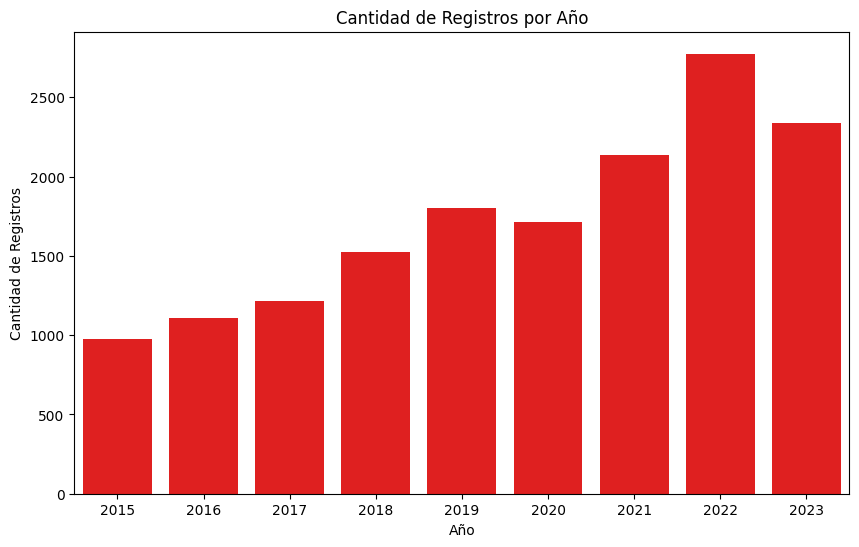

In [16]:
registros_por_año = df['AÑO'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
sns.barplot(x=registros_por_año.index, y=registros_por_año.values, color='red')

# Añadir título y etiquetas al gráfico
plt.title('Cantidad de Registros por Año')
plt.xlabel('Año')
plt.ylabel('Cantidad de Registros')

# Mostrar el gráfico
plt.show()

c:\Users\Cai Selvas Sala\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Cai Selvas Sala\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


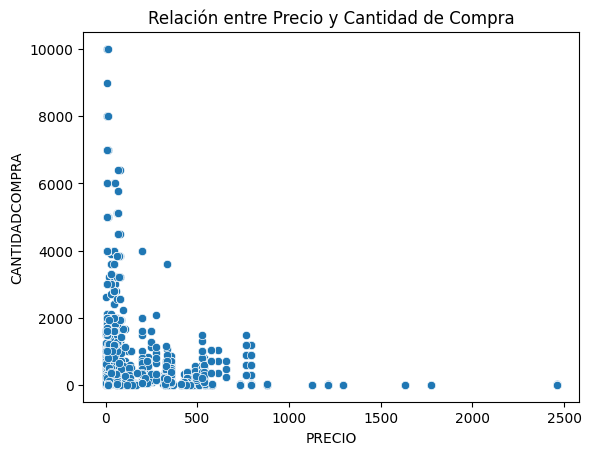

c:\Users\Cai Selvas Sala\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Cai Selvas Sala\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Cai Selvas Sala\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


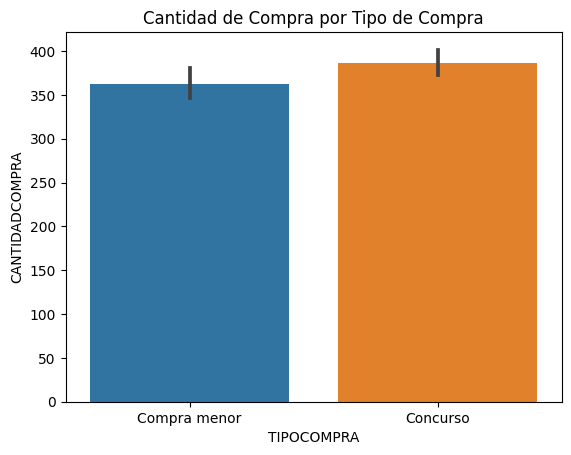

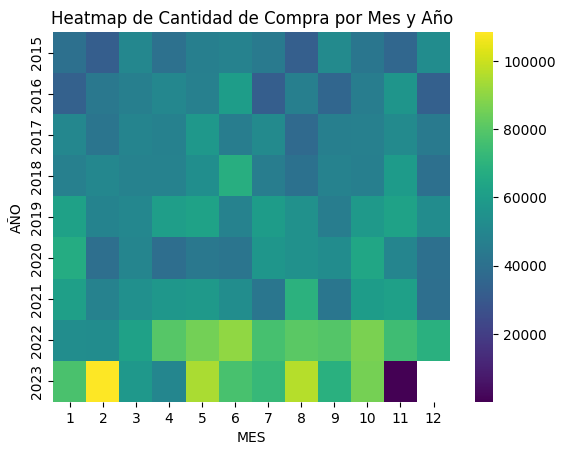

In [17]:
sns.scatterplot(x='PRECIO', y='CANTIDADCOMPRA', data=df)
plt.title('Relación entre Precio y Cantidad de Compra')
plt.show()

# Bar Plot de Cantidad Compra por Tipo de Compra
sns.barplot(x='TIPOCOMPRA', y='CANTIDADCOMPRA', data=df)
plt.title('Cantidad de Compra por Tipo de Compra')
plt.show()

# Heatmap de Cantidad Compra por Mes y Año
pivot_table = df.pivot_table(values='CANTIDADCOMPRA', index='AÑO', columns='MES', aggfunc='sum')
sns.heatmap(pivot_table, cmap='viridis')
plt.title('Heatmap de Cantidad de Compra por Mes y Año')
plt.show()

c:\Users\Cai Selvas Sala\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Cai Selvas Sala\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Cai Selvas Sala\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Cai Selvas Sala\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: Fut

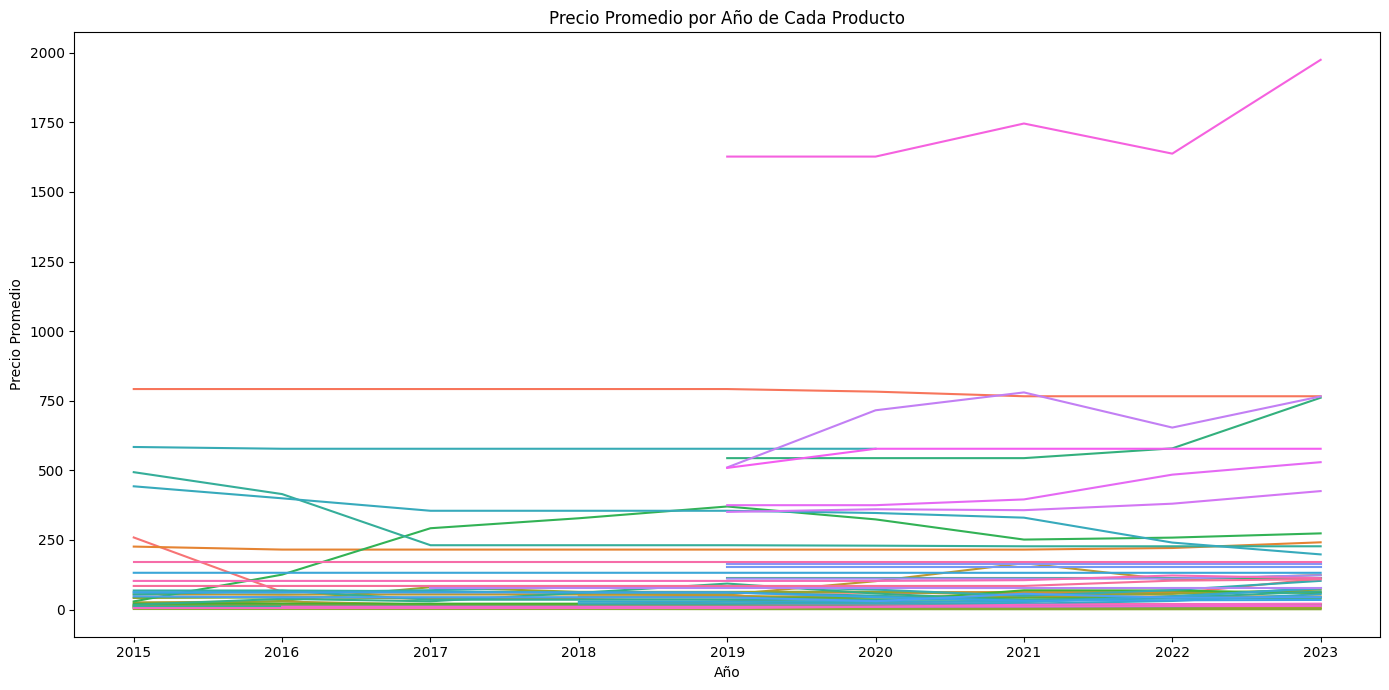

In [18]:
precio_promedio_por_año = df.groupby(['PRODUCTO', 'AÑO'])['PRECIO'].mean().reset_index()

# Crear un gráfico lineal para cada producto
plt.figure(figsize=(14, 7))

# Generar una paleta de colores, una para cada producto
palette = sns.color_palette("husl", len(precio_promedio_por_año['PRODUCTO'].unique()))

# Dibujar las líneas para cada producto
# El parámetro 'hue' determina qué columna en el DataFrame determina el color de la línea
# El parámetro 'legend' se establece en 'False' para ocultar la leyenda debido a la gran cantidad de productos
sns.lineplot(data=precio_promedio_por_año, x='AÑO', y='PRECIO', hue='PRODUCTO', palette=palette, legend=False)

# Añadir título y etiquetas
plt.title('Precio Promedio por Año de Cada Producto')
plt.xlabel('Año')
plt.ylabel('Precio Promedio')

# Mostrar el gráfico
plt.tight_layout()  # Ajusta automáticamente los parámetros de la figura
plt.show()

c:\Users\Cai Selvas Sala\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Cai Selvas Sala\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


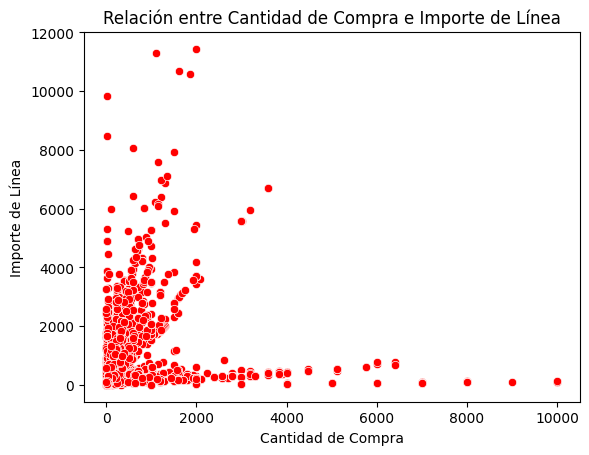

In [19]:
# Gráfico de dispersión para visualizar la relación entre IMPORTELINEA y CANTIDADCOMPRA
sns.scatterplot(x='CANTIDADCOMPRA', y='IMPORTELINEA', data=df, color='red')

# Títulos y etiquetas
plt.title('Relación entre Cantidad de Compra e Importe de Línea')
plt.xlabel('Cantidad de Compra')
plt.ylabel('Importe de Línea')

# Mostrar el gráfico
plt.show()